In [12]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

### Movie Data
1. scrape table on highest grossing movies
2. clean data and place in a dictionary
5. convert dictionary to a pandas dataframe

In [7]:
moviepage = requests.get("http://www.the-numbers.com/movie/records/All-Time-Domestic-Box-Office")
moviesoup = BeautifulSoup(moviepage.text, "lxml")

### Format
Data will be extracted to a dictionary with keys **year**, **title**, **domestic**, **international**, and **worldwide**. All data except for the title will be converted to integers as part of the cleaning process.

In [17]:
nondecimal = re.compile(r'[^\d]+')
yearlist = []
titlelist = []
domlist = []
interlist = []
worldlist = []

movierows = moviesoup.find_all('tr')
movierows = movierows[1:]

for row in movierows:
    cols = row.find_all('td')
    cols = cols[1:]
    
    yearlist.append(int(cols[0].text))
    titlelist.append(cols[1].text)
    domlist.append(int(nondecimal.sub('', cols[2].text)))
    interlist.append(int(nondecimal.sub('', cols[3].text)))
    worldlist.append(int(nondecimal.sub('', cols[4].text)))
    
movieDataDict = {}
movieDataDict['year'] = yearlist
movieDataDict['title'] = titlelist
movieDataDict['domestic'] = domlist
movieDataDict['international'] = interlist
movieDataDict['worldwide'] = worldlist

### transform dictionary into DataFrame

5. After transforming the data into a DataFrame, render the table to check success
8. Plot Year against domestic receipts, to satisfy curiosity
1. Save DataFrame as a .csv file

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
movieframe = pd.DataFrame(movieDataDict)
movieframe.head()

,domestic,international,title,worldwide,year
0,936662225,1122000000,Star Wars Ep. VII: The Force Awakens,2058662225,2015
1,760507625,2023411357,Avatar,2783918982,2009
2,658672302,1548943366,Titanic,2207615668,1997
3,652198010,1018130015,Jurassic World,1670328025,2015
4,623279547,896200000,The Avengers,1519479547,2012


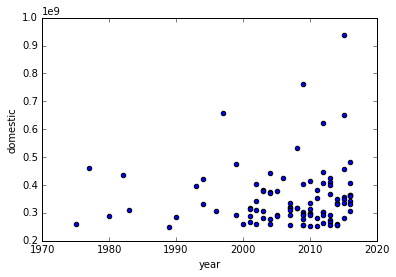

In [23]:
movieframe.plot(x='year', y='domestic', kind='scatter')

In [24]:
movieframe.to_csv('movie_reciepts.csv')